In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
df = pd.read_csv('aapl.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
2006-10-02,2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.310338
2006-10-03,2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.286266
2006-10-04,2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.326385
2006-10-05,2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.309412
2006-10-06,2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.290586


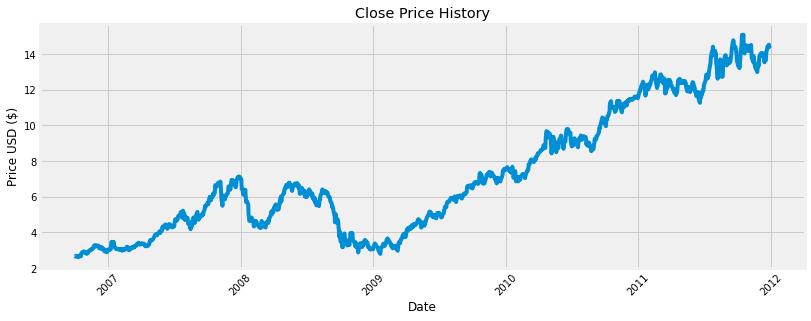

In [7]:
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()


In [8]:
#Calculate the MACD and signal line indicators
#Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust = False).mean()
#Calculate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust = False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

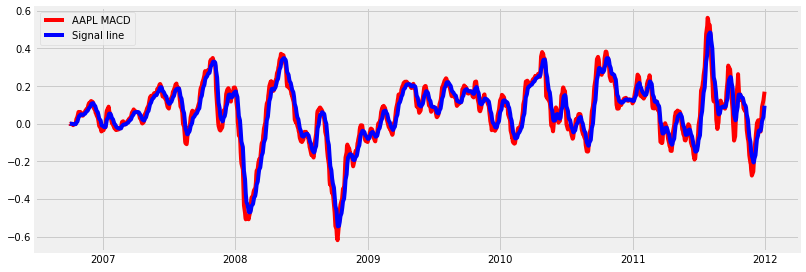

In [9]:
#plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'AAPL MACD', color = 'red')
plt.plot(df.index, signal, label = 'Signal line', color = 'blue')
plt.legend(loc='upper left')
plt.show()